# **Proyecto Final**


**Nombres=**

-Sebastián Cobaise

-Arturo Lazcano

-Sebastián Toloza

**Curso=** Control óptimo: Teoría y Laboratorio


## Imports

In [ ]:
!pip install --upgrade sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install celluloid
from celluloid import Camera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import sympy as sp
import numpy as np
from sympy.abc import x
import matplotlib.pyplot as plt
import time as ti

from sympy import dsolve, symbols, Eq, Function, Derivative, sin, cos
from scipy.integrate import solve_ivp
from scipy.optimize import linprog, minimize, fsolve

plt.rcParams['text.usetex'] = False

In [ ]:
!pip install control
from control import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Resolver la EDP con el control óptimo:


$\displaystyle \frac{\partial k}{\partial t}(t,x) = \frac{\partial^2 k}{\partial x^2}(t,x) + A\cdot k(t,x) - c(t,x)$

$\displaystyle C(t,x))=\frac{\rho-A(1-\sigma)}{2\pi\sigma}\int k(t,x)dx$

## Condiciones iniciales y control óptimo

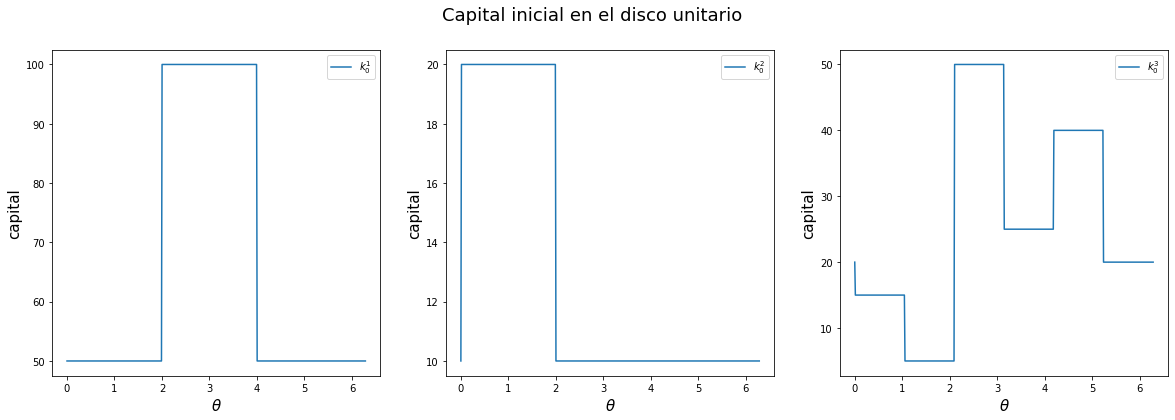

In [57]:
#Consideramos como dominio el intervalo [0,2pi]
#y la siguiente condición inicial.
def k0(x):
  if x<0 or x>2*np.pi:
    return 0
  if 2<x<4:
    return 100
  else:
    return 50

def k0_2(x):
  if x<0 or x>2*np.pi:
    return 0
  if 0<x<2:
    return 20
  else:
    return 10

def k0_3(x):
  if x<0 or x>2*np.pi:
    return 0
  if 0 < x <= np.pi/3:
    return 15
  if np.pi/3 < x <= 2*np.pi/3:
    return 5
  if 2*np.pi/3 < x <= np.pi:
    return 50
  if np.pi < x <= 4*np.pi/3:
    return 25
  if 4*np.pi/3 < x <= 5*np.pi/3:
    return 40
  else:
    return 20

x = np.linspace(0, 2*np.pi, 500)

y1=[]
for i in x:
  y1.append(k0(i))

y2=[]
for i in x:
  y2.append(k0_2(i))

y3=[]
for i in x:
  y3.append(k0_3(i))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))
ax1.plot(x,y1, label=r'$k_0^1$')
ax1.set_xlabel(r'$\theta$', fontsize=15)
ax1.set_ylabel('capital', fontsize=15)
ax1.legend()
ax2.plot(x,y2, label=r'$k_0^2$')
ax2.set_xlabel(r'$\theta$', fontsize=15)
ax2.set_ylabel('capital', fontsize=15)
ax2.legend()
ax3.plot(x,y3, label=r'$k_0^3$')
ax3.set_xlabel(r'$\theta$', fontsize=15)
ax3.set_ylabel('capital', fontsize=15)
ax3.legend()
fig.suptitle("Capital inicial en el disco unitario", fontsize=18)
plt.show()

In [58]:
# Parámetros

ro=0.07
A=1/3
sigma=0.8

dt=0.001
N=20
T=0.5

#Control óptimo
# k  : vector capital de todo el espacio,
# dx : discretizado con dx (1>>num>0)
def c(k,N):
  dx=1/(N+1)
  constante=(ro-A*(1-sigma))/(2*np.pi*sigma)
  integral=0
  for i in range(len(k)-1):
    integral+=k[i]*dx
  return constante*integral

## Simulación

### Diferencias Finitas

In [63]:
#Recibe:
#k0 : condición inicial (función de Python)
#dt : discretización temporal (1>>num>0)
#dx : discretización espacial (1>>num>0)


def simulacion1d(k0,dt,N,T):
  start_time = ti.time()
  fig = plt.figure(figsize = (10,10))
  camera = Camera(fig) 
  #numero de iteraciones:
  iters=int(T//dt)

  #discretizacion espacial
  dx=1/(N+1)

  x=np.linspace(0,2*np.pi,N+2)

  estados=[]
  #Resolución
  for t in range(0,iters+1):
    if t==0:
      ci=[]
      for i in range(0,N+2):
        ci.append(k0(x[i]))
      plt.plot(x,ci,c="g") 
      presente=ci
      estados.append(ci)
    else:
      futuro=np.zeros(N+2)

      #Condiciones de borde
      futuro[0]=presente[0]+dt*(presente[1]+presente[N]-2*presente[0])/(dx**2)+dt*A*presente[0]-dt*c(presente,N)
      futuro[N+1]=futuro[0]

      #Puntos interiores
      for i in range(1,N+1):
        futuro[i]=presente[i]+dt*(presente[i+1]+presente[i-1]-2*presente[i])/(dx**2)+dt*A*presente[i]-dt*c(presente,N)
      plt.plot(x,futuro,c="g")
      presente=futuro 
      estados.append(futuro)
    camera.snap() 

  plt.grid()
  plt.xlabel('x')
  plt.ylabel('Capital')
  plt.title("Movimiento del capital con el control óptimo")
  anim = camera.animate(blit=False, interval=100) 
  anim.save('solucion_edp'+'.gif', writer='pillow', fps=10)
  print("--- %s seconds ---" % (ti.time() - start_time))
  return estados

--- 45.37941336631775 seconds ---


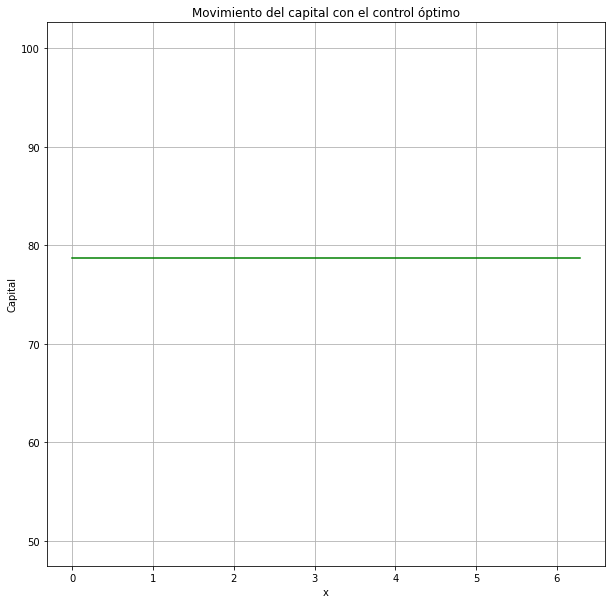

In [ ]:
estados=simulacion1d(k0,dt,N,T)

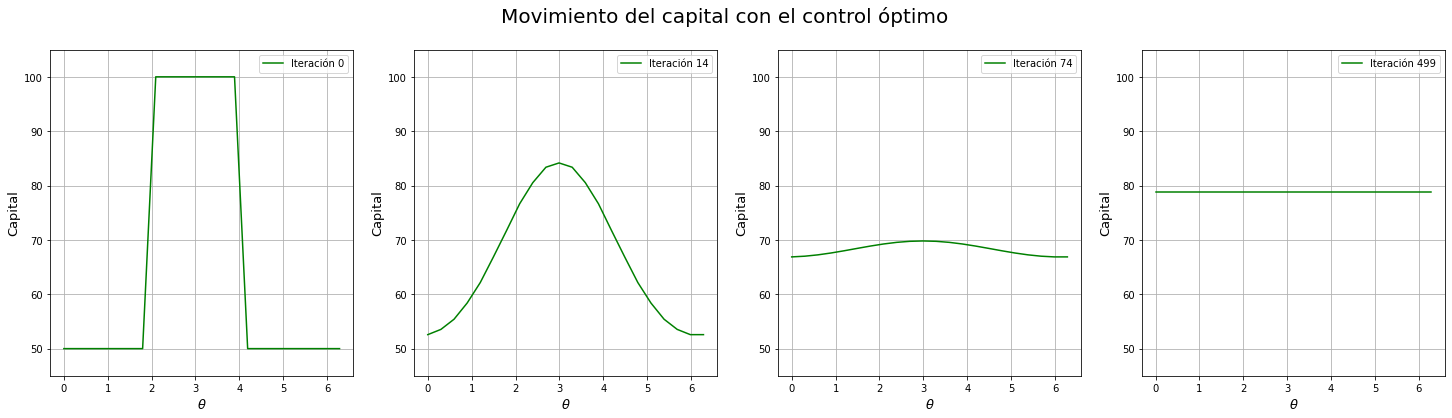

In [ ]:
# Gráfico en 4 iteraciones distintas para simular la evolución temporal
# condición inicial k0_1

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25,6))
x=np.linspace(0,2*np.pi,N+2)
for ax, i in zip([ax1, ax2, ax3, ax4], [0, int((T//dt)*0.03), int((T//dt)*0.15), int(T//dt)]):         
  ax.plot(x,estados[i],c="g", label='Iteración '+str(i))
  ax.set_ylim(45,105)
  ax.grid()
  ax.legend()
  ax.set_xlabel(r'$\theta$', fontsize=13)
  ax.set_ylabel('Capital', fontsize=13)
  fig.suptitle("Movimiento del capital con el control óptimo", fontsize=20)
plt.show()

--- 76.9646384716034 seconds ---


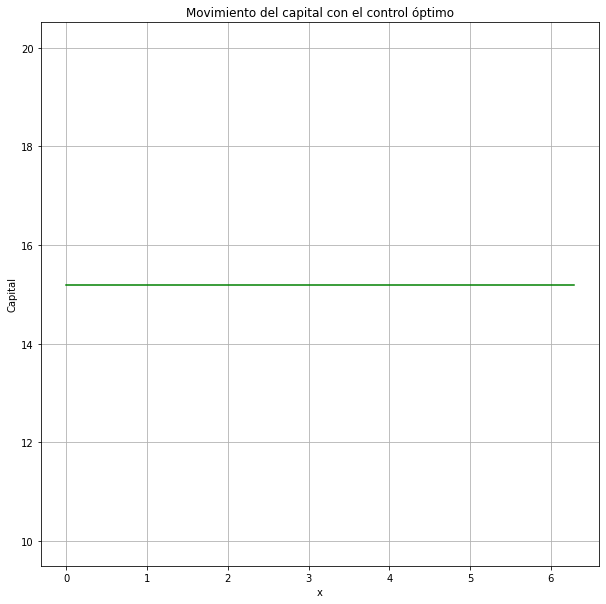

In [ ]:
estados2=simulacion1d(k0_2,dt,N,T)

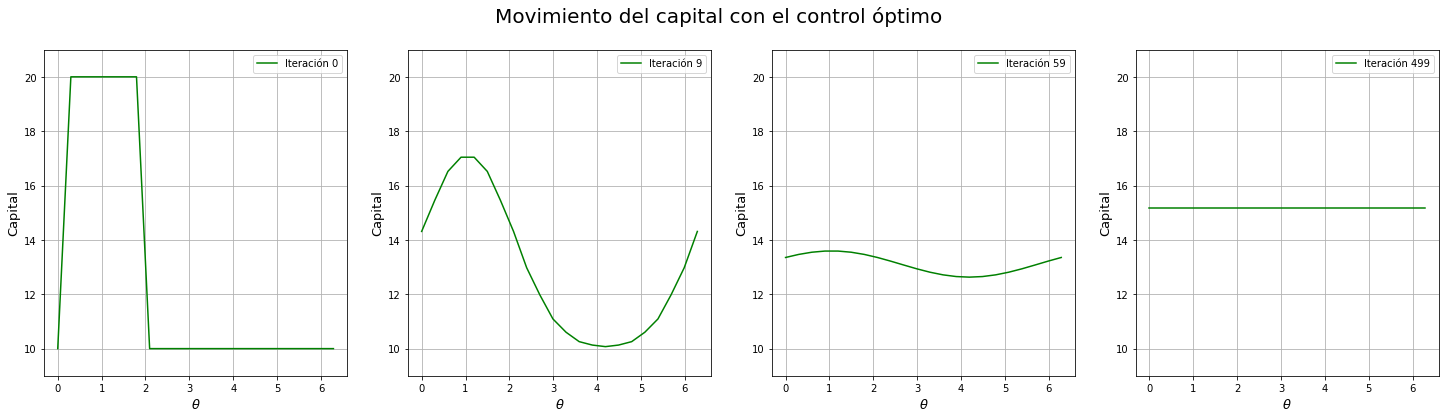

In [ ]:
# Gráfico en 4 iteraciones distintas para simular la evolución temporal
# condición inicial k0_2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25,6))
x=np.linspace(0,2*np.pi,N+2)
for ax, i in zip([ax1, ax2, ax3, ax4], [0, int((T//dt)*0.02), int((T//dt)*0.12), int(T//dt)]):         
  ax.plot(x,estados2[i],c="g", label='Iteración '+str(i))
  ax.set_ylim(9,21)
  ax.grid()
  ax.legend()
  ax.set_xlabel(r'$\theta$', fontsize=13)
  ax.set_ylabel('Capital', fontsize=13)
  fig.suptitle("Movimiento del capital con el control óptimo", fontsize=20)
plt.show()

--- 49.70902109146118 seconds ---


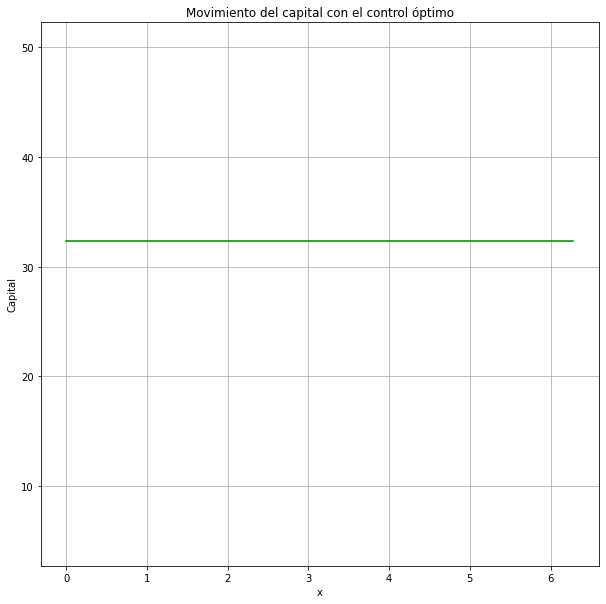

In [64]:
estados3=simulacion1d(k0_3,dt,N,T)

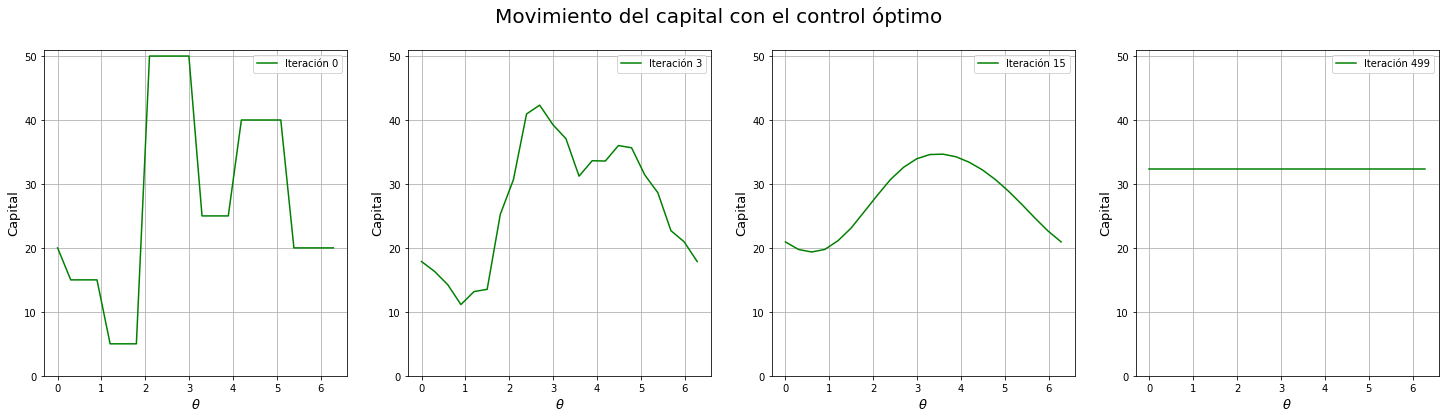

In [69]:
# Gráfico en 4 iteraciones distintas para simular la evolución temporal
# condición inicial k0_3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25,6))
x=np.linspace(0,2*np.pi,N+2)
for ax, i in zip([ax1, ax2, ax3, ax4], [0, 3, 15, int(T//dt)]):         
  ax.plot(x,estados3[i],c="g", label='Iteración '+str(i))
  ax.set_ylim(0,51)
  ax.grid()
  ax.legend()
  ax.set_xlabel(r'$\theta$', fontsize=13)
  ax.set_ylabel('Capital', fontsize=13)
  fig.suptitle("Movimiento del capital con el control óptimo", fontsize=20)
plt.show()

### Método de EDO

--- 119.31413984298706 seconds ---


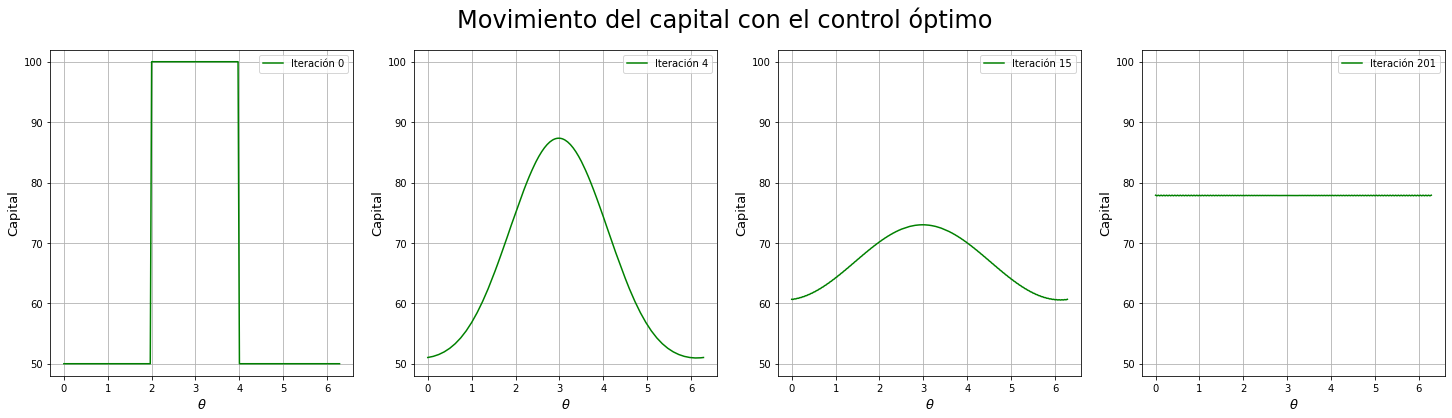

In [30]:
# Parámetros

ro=0.07
A=1/3
sigma=0.8
N=200
T=0.5

# Recibe:
# t: array (tiempo)
# x: array 

def sistema(t, x): #forma dy/dt = f(t,y)
  h = 1/(N+1)
  L = np.zeros((len(x),len(x)))
  np.fill_diagonal(L, -2) 
  for i in range(0,len(L[0])-1):
    L[i+1][i] = 1
    L[i][i+1] = 1
  L[0][-2] = 1
  L[-1][1] = 1
  L = (1/h**2)*L
  return L@x + A*x - c(x,N)

# condición inicial 1

x=np.linspace(0,2*np.pi,N+2)
ci=[]
for i in x:
  ci.append(k0(i))

# Simulación con primera condición final

def simulacion1d_2(sistema, ci):
  start_time = ti.time()
  x=np.linspace(0,2*np.pi,N+2)
  sol = solve_ivp(sistema,[0,T],ci,dense_output=True)
  time = np.linspace(0,T,len(x))
  sol_densa = sol.sol(time)
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25,6))
  for ax, i in zip([ax1, ax2, ax3, ax4], [0, 4, 15, len(x)-1]):    
    ax.plot(x,sol_densa.T[i],c="g", label='Iteración '+str(i))
    ax.legend()
    ax.set_ylim(48,102)
    ax.grid()
    ax.set_xlabel(r'$\theta$', fontsize=13)
    ax.set_ylabel('Capital', fontsize=13)
  fig.suptitle("Movimiento del capital con el control óptimo", fontsize=24)
  print("--- %s seconds ---" % (ti.time() - start_time))
  plt.show()
simulacion1d_2(sistema, ci) 

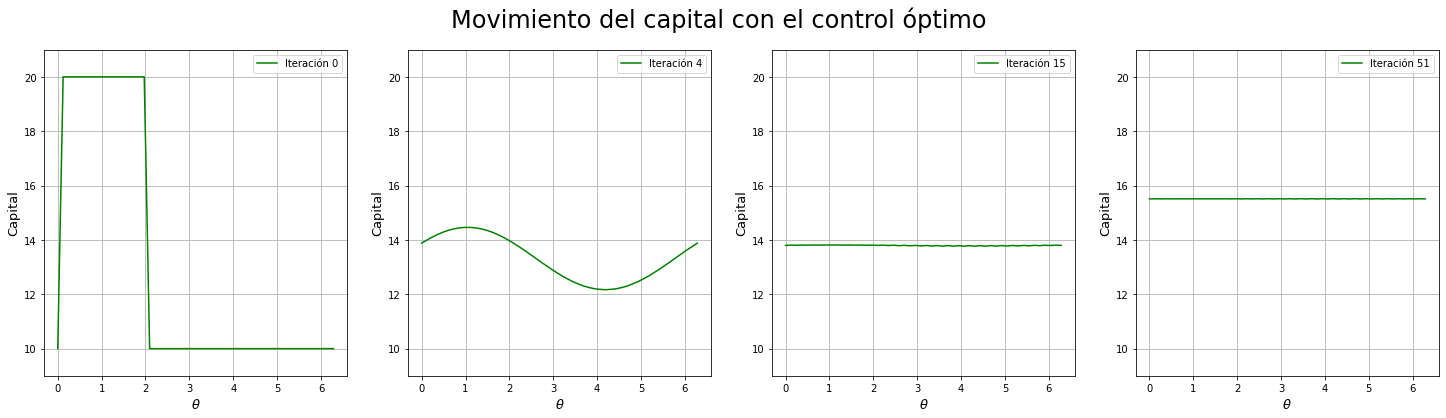

--- 1.6597137451171875 seconds ---


In [ ]:
# condición inicial 2

ro=0.07
A=1/3
sigma=0.8
N=200
T=0.5

x=np.linspace(0,2*np.pi,N+2)
ci=[]
for i in x:
  ci.append(k0_2(i))

# Simulación con segunda condición final

def simulacion1d_3(sistema, ci):
  start_time = ti.time()
  x=np.linspace(0,2*np.pi,N+2)
  sol = solve_ivp(sistema,[0,T],ci,dense_output=True)
  time = np.linspace(0,T,len(x))
  sol_densa = sol.sol(time)
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25,6))
  for ax, i in zip([ax1, ax2, ax3, ax4], [0, 4, 15, len(x)-1]):    
    ax.plot(x,sol_densa.T[i],c="g", label='Iteración '+str(i))
    ax.legend()
    ax.set_ylim(9,21)
    ax.grid()
    ax.set_xlabel(r'$\theta$', fontsize=13)
    ax.set_ylabel('Capital', fontsize=13)
  fig.suptitle("Movimiento del capital con el control óptimo", fontsize=24)
  plt.show()
  print("--- %s seconds ---" % (ti.time() - start_time))
simulacion1d_3(sistema, ci) 

In [72]:
# condición inicial 3

ro=0.07
A=1/3
sigma=0.8
N=200
T=0.5

x=np.linspace(0,2*np.pi,N+2)
ci=[]
for i in x:
  ci.append(k0_3(i))

# Simulación con tercera condición final

def simulacion1d_4(sistema, ci):
  start_time = ti.time()
  x=np.linspace(0,2*np.pi,N+2)
  sol = solve_ivp(sistema,[0,T],ci,dense_output=True)
  time = np.linspace(0,T,len(x))
  sol_densa = sol.sol(time)
  print("--- %s seconds ---" % (ti.time() - start_time))
  return sol_densa
sol=simulacion1d_4(sistema, ci)

--- 121.51733136177063 seconds ---


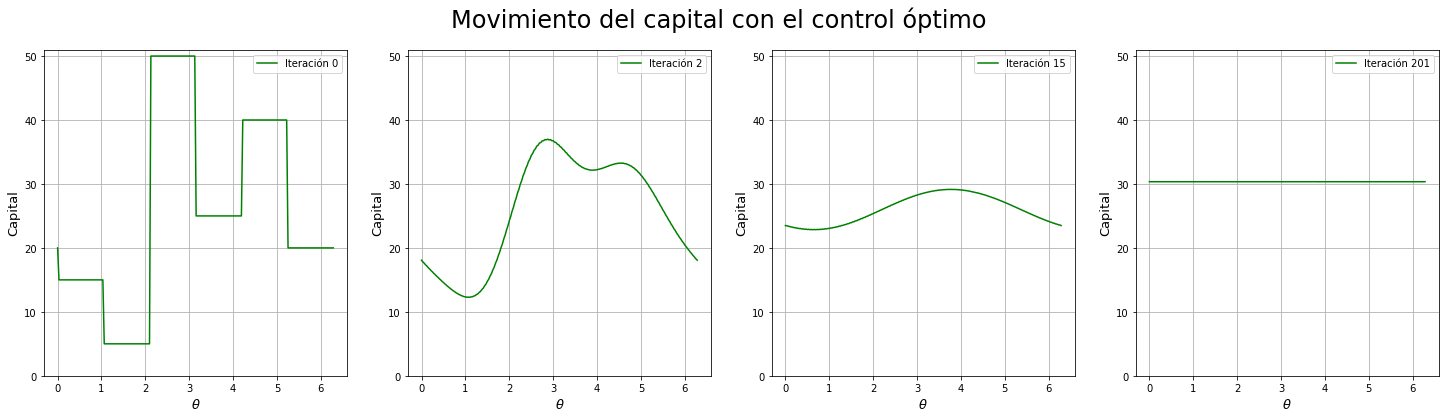

In [73]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25,6))
for ax, i in zip([ax1, ax2, ax3, ax4], [0, 2, 15, len(x)-1]):    
  ax.plot(x,sol.T[i],c="g", label='Iteración '+str(i))
  ax.legend()
  ax.set_ylim(0,51)
  ax.grid()
  ax.set_xlabel(r'$\theta$', fontsize=13)
  ax.set_ylabel('Capital', fontsize=13)
fig.suptitle("Movimiento del capital con el control óptimo", fontsize=24)
plt.show()